In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.9.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0)
ERROR: No matching distribution found for tensorflow==2.9.0


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --user tensorflow-datasets

In [6]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [55]:
pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.4.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.4.1
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atom

In [2]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.14.0


In [3]:
from tensorflow import resource 

In [5]:
pip install --user tfds-nightly --no-cache-dir --force-reinstall --upgrade

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow_datasets as tfds

In [5]:
from matplotlib import pyplot as plt

In [6]:
ds = tfds.load('fashion_mnist', split='train')

In [7]:
ds.as_numpy_iterator().next()['label']

2

In [8]:
import numpy as np

In [9]:
dataiterator = ds.as_numpy_iterator()

In [10]:
dataiterator.next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

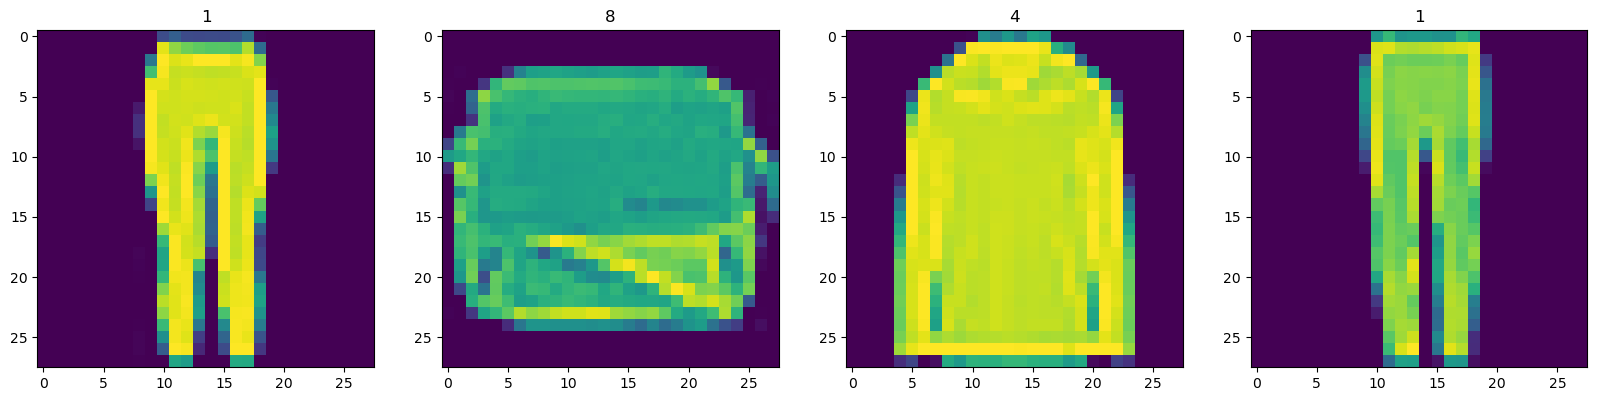

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample = dataiterator.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])

In [12]:
def scale_images(data): 
    image = data['image']
    return image / 255

In [13]:
ds = tfds.load('fashion_mnist', split='train')
ds = ds.map(scale_images) 
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64) # try 128

In [14]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D, BatchNormalization

In [17]:
def build_generator(): 
    model = Sequential()
    # add dropout and batch normalization layers
    
    # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(7*7*128, input_dim=128))
    model.add(BatchNormalization(momentum=0.9))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    model.add(Dropout(0.4))

    
    # Upsampling block 1 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(BatchNormalization(momentum=0.9))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Upsampling block 2 
    model.add(UpSampling2D())
    model.add(Conv2D(64, 5, padding='same'))
    model.add(BatchNormalization(momentum=0.9))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    '''
    # Convolutional block 1
    model.add(Conv2D(32, 5, padding='same'))
    model.add(BatchNormalization(momentum=0.9))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Convolutional block 2
    model.add(Conv2D(16, 5, padding='same'))
    model.add(BatchNormalization(momentum=0.9))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    '''
    # Conv layer to get to one channel
    model.add(Conv2D(1, 5, padding='same', activation='sigmoid'))
    
    return model


In [18]:
generator = build_generator()

In [19]:
#generator.summary()

In [20]:
img = generator.predict(np.random.randn(4,128,1))
#img

1/1 [==============================] - 1s 570ms/step


In [21]:
# Generate new fashion
#img = generator.predict(np.random.randn(4,128,1))

In [22]:
img.shape

(4, 28, 28, 1)

In [23]:
img1 = img[0]

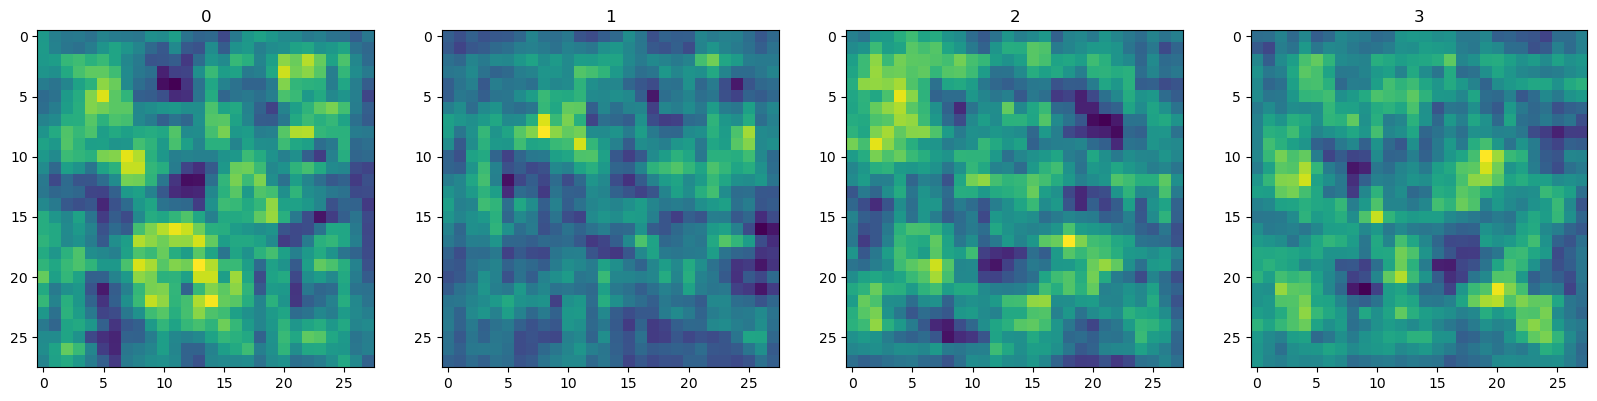

In [24]:
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx, img in enumerate(img): 
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(idx)

In [25]:
def build_discriminator(): 
    model = Sequential()
    
    # First Conv Block
    #32 filters with shape of 5 by 5
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(BatchNormalization(momentum=0.9))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(BatchNormalization(momentum=0.9))
    model.add(LeakyReLU(0.2)) 
    model.add(Dropout(0.4))
    
    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(BatchNormalization(momentum=0.9))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    '''
    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(BatchNormalization(momentum=0.9))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    '''
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model 

In [26]:
discriminator = build_discriminator()

In [27]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_3 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout_3 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 batch_normalization_4 (Bat  (None, 20, 20, 64)        256       
 chNormalization)                                     

In [28]:
img1.shape

(28, 28, 1)

In [29]:
img1 = np.reshape(img1, (1,28,28,1))
img1.shape

(1, 28, 28, 1)

In [30]:
discriminator.predict(img1)

1/1 [==============================] - 0s 124ms/step


array([[0.4915559]], dtype=float32)

In [31]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam, RMSprop
# Binary cross entropy is going to be the loss for both 
from tensorflow.keras.losses import BinaryCrossentropy

In [32]:
#g_opt = Adam(learning_rate=0.1) 
g_opt = RMSprop(learning_rate=0.01, clipvalue=1.0)
#d_opt = Adam(learning_rate=0.1) 
d_opt = RMSprop(learning_rate=0.01, clipvalue=1.0)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [33]:
# Importing the base model class to subclass our training step 
from tensorflow.keras.models import Model

In [34]:
tf.concat([tf.zeros_like(tf.random.normal((6,128))), tf.ones_like(tf.random.normal((6,128)))], axis=0)

<tf.Tensor: shape=(12, 128), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

In [35]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        
        super().compile(*args, **kwargs)
        
        
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [36]:
fashgan = FashionGAN(generator, discriminator)

In [37]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

In [38]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [39]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [40]:
data_on_gpu = tf.convert_to_tensor(img, dtype=tf.float32)

In [41]:
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
469/469 [==============================] - 3012s 6s/step - d_loss: 1.6595 - g_loss: 24.9513
Epoch 2/20
469/469 [==============================] - 3070s 7s/step - d_loss: 6.1724 - g_loss: 4.1776
Epoch 3/20
469/469 [==============================] - 3258s 7s/step - d_loss: 7.7156 - g_loss: 9.8716e-04
Epoch 4/20
469/469 [==============================] - 2992s 6s/step - d_loss: 7.7199 - g_loss: 0.2188
Epoch 5/20
469/469 [==============================] - 2946s 6s/step - d_loss: 7.7205 - g_loss: 0.0000e+00
Epoch 6/20
469/469 [==============================] - 2700s 6s/step - d_loss: 7.7154 - g_loss: 0.0000e+00
Epoch 7/20
469/469 [==============================] - 2941s 6s/step - d_loss: 7.7209 - g_loss: 0.0000e+00
Epoch 8/20
469/469 [==============================] - 2843s 6s/step - d_loss: 7.7112 - g_loss: 0.0000e+00
Epoch 9/20
469/469 [==============================] - 2858s 6s/step - d_loss: 7.7176 - g_loss: 0.0000e+00
Epoch 10/20
469/469 [==============================] - 31

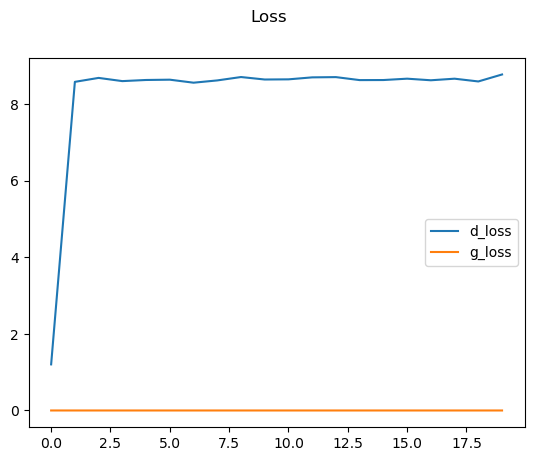

In [51]:
#generator.save('generator.h5')
#discriminator.save('discriminator.h5')
generator.save('generator.h5')

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

1/1 [==============================] - 1s 1s/step


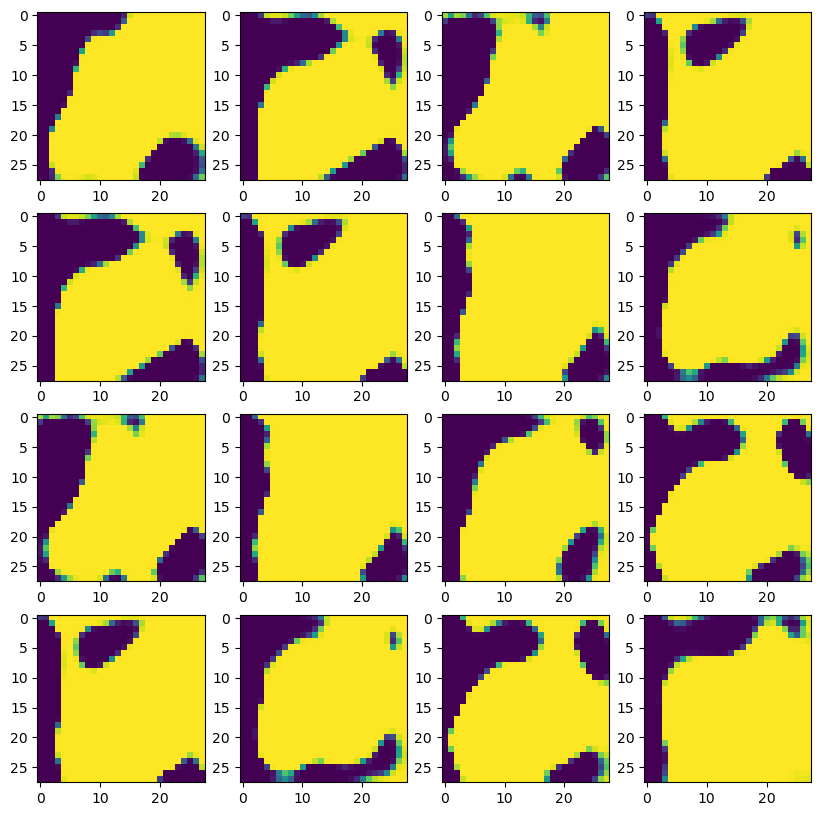

In [45]:
#generator.load_weights(os.path.join('archive', 'generatormodel.h5'))
imgs = generator.predict(tf.random.normal((16, 128, 1)))
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])


In [69]:
generator.save('generator.keras')
discriminator.save('discriminator.keras')

In [70]:
generator.compile(loss='BinaryCrossentropy', optimizer='Adam')
discriminator.compile(loss='BinaryCrossentropy', optimizer='Adam')

1/1 [==============================] - 0s 98ms/step


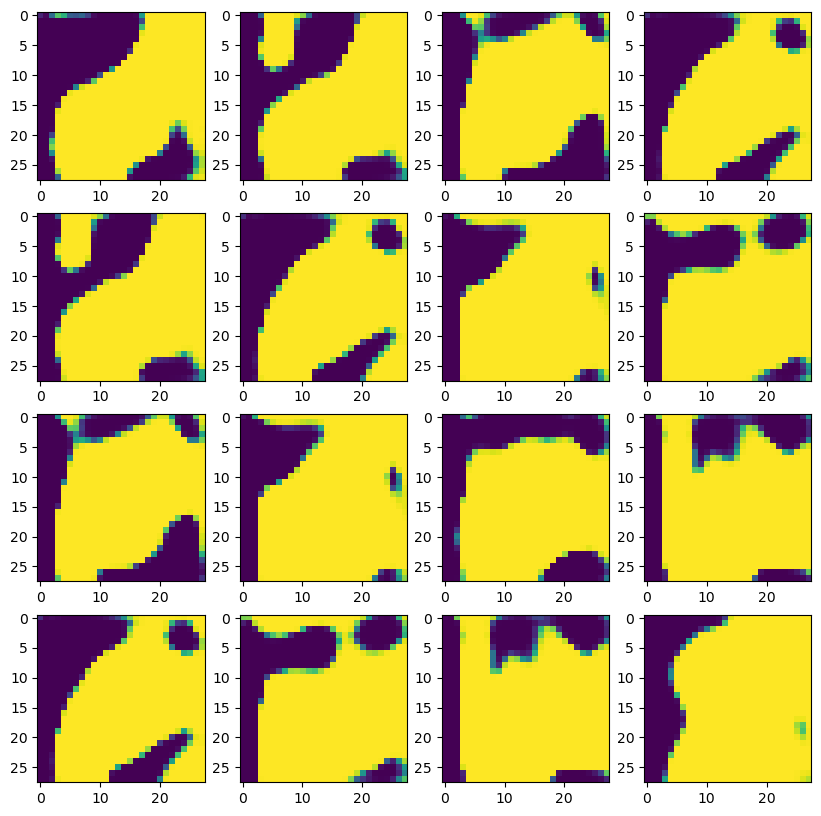

In [75]:
generator.load_weights(os.path.join('generator.keras'))
imgs = generator.predict(tf.random.normal((16, 128, 1)))
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])